<a href="https://colab.research.google.com/github/DeepDon/Deepak-Rajamohanan.github.io/blob/main/Clustering_income_spend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering using income spent

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load dataset

In [4]:
from google.colab import files
upload = files.upload()

Saving dataset.csv to dataset.csv


import dataset

In [5]:
dataset = pd.read_csv('dataset.csv')

summarize dataset

In [6]:
print (dataset.shape)
print (dataset.describe)
print (dataset.head(5))

(303, 2)
<bound method NDFrame.describe of      INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]>
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


"""### Segregate & Zipping Dataset"""You’re turning two columns of data — one for income, one for spending — into a list of pairs like this:
[(income1, spend1), (income2, spend2), ...]

This format is useful for things like plotting data on a graph or feeding it into a machine learning model.

It pairs each value from the Income list with the matching value in the Spend list.
(So, if person 1 has income = 5000 and spend = 3000, it becomes one pair: (5000, 3000), and so on.)

zip() makes these pairs.

list() turns those pairs into a list of all the (income, spend) pairs.

np.array() changes that list into a special format (called a NumPy array) that's good for maths or machine learning work.

All of this is stored in a new variable X

In [7]:
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list (zip(Income,Spend)))
X

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

"""### Finding the Optimized K Value"""

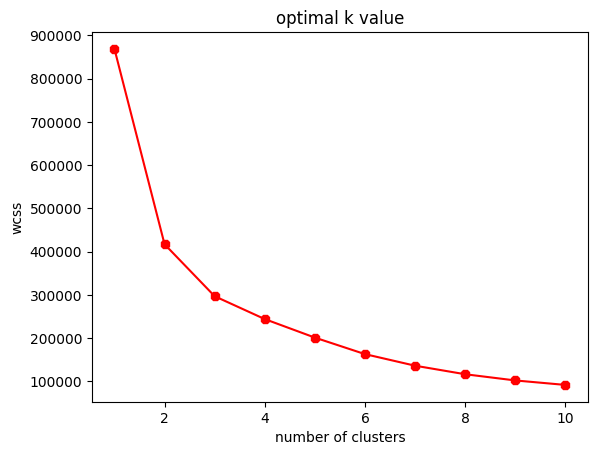

In [11]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
  km=KMeans(n_clusters=i, random_state=0)
  km.fit(X)
  WCSS.append(km.inertia_)
plt.plot(range(1,11),WCSS,color ="red",marker = "8")
plt.title('optimal k value')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

"""### Fitting the k-means to the dataset with k=4"""

In [18]:
model=KMeans(n_clusters = 4, random_state = 0)
y_means = model.fit_predict (X)

"""### Visualizing the clusters for k=4

Cluster 1: Customers with medium income and low spend

Cluster 2: Customers with high income and medium to high spend

Cluster 3: Customers with low income

Cluster 4: Customers with medium income but high spend
"""
"We are going to show the result of dividing customers into 4 groups based on their income and spending." This code draws a colorful chart that:

Groups customers based on income & spending patterns.

Uses different colors to show each group.

Shows the "center" of each group with a red square.

Helps businesses or analysts understand customer behavior patterns at a glance.

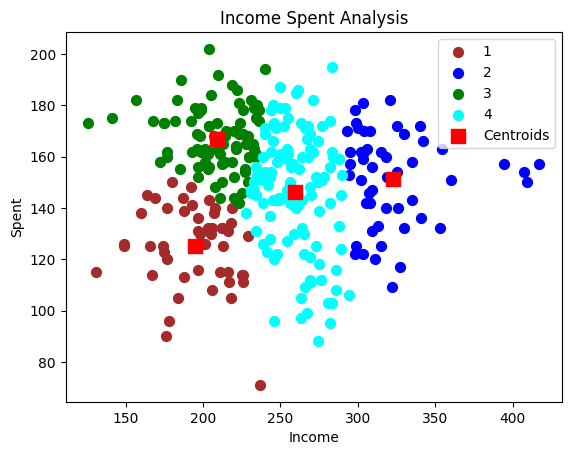

In [19]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()